In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Scandinavia'

link = 'https://rally-base.com/2023/royal-rally-of-scandinavia-2023/?ssId='
startat, no_ss=7684, int(16) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,1,Paddon Ha,RC2,00:04:15.0,114.21 0.00,00:00:00.0 00:00:00.0,1,Scandinavia,1
2,2,5,Solberg O,RC2,00:04:15.4,114.03 0.05,00:00:00.4 00:00:00.4,1,Scandinavia,2
3,3,19,Gryazin N,RC2,00:04:17.6,113.06 0.32,00:00:02.6 00:00:02.2,1,Scandinavia,3
4,4,6,Sesks M.,RC2,00:04:17.8,112.97 0.35,00:00:02.8 00:00:00.2,1,Scandinavia,4
5,4,8,Heikkilä,RC2,00:04:17.8,112.97 0.35,00:00:02.8 00:00:00.0,1,Scandinavia,5
...,...,...,...,...,...,...,...,...,...,...
32,32,41,Andersson,RC4,00:05:38.2,95.88 6.49,00:00:58.4 00:00:02.9,16,Scandinavia,32
33,33,48,Åkesson J,RC2,00:05:50.1,92.64 7.80,00:01:10.3 00:00:11.9,16,Scandinavia,33
34,34,46,Kreuter N,RC4,00:05:52.6,91.97 8.08,00:01:12.8 00:00:02.5,16,Scandinavia,34
35,35,38,Spitalier,RC4,00:06:05.2,88.81 9.48,00:01:25.4 00:00:12.6,16,Scandinavia,35


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                                Pos.                                          \
ss                                 1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                       
1   Paddon  Ha RC2   Scandinavia    1   1   2   2   1   2   2   3   1   1   2   
2   Østberg  M RC2   Scandinavia   15  13  11  11  11  11  11  12  11   9  10   
3   Llarena  E RC2   Scandinavia   11   9  14  17  12  12  13  10  18   -   -   
4   Mabellini  RC2   Scandinavia   14  14  12  14   9  10  12  13  20  12  15   
5   Solberg  O RC2   Scandinavia    2   2   1   1   2   1   1   1   2   2   1   
6   Sesks  M.  RC2   Scandinavia    4   7   6   8   4   3   4   3   4   3   4   
7   Franceschi RC2   Scandinavia    9  10  10  16   7   8   5   7  28  14   8   
8   Heikkilä   RC2   Scandinavia    4   6   4   4   3   6   3   2   3   4   6   
9   McErlean   RC2   Scandinavia    7  18   8   7  40  39  38  38  16  10  16   
10  Mareš  Fil RC2   Scandinavia   19   8   9   9  10   9   9  11  10  13  14   
11  Rådström   RC2   Scandinavia   18  17  17  20  18  39  38   -   -   -   -   
12  László  Ma RC2   Scandinavia   22  36  27  26  20  20  20  20  19  17  17   
14  Campedelli RC2   Scandinavia   47  19  13  13  14  14  14  15  17   -   -   
15  Battistoll RC2   Scandinavia   20  22  19  21  17  18  18  19  15  15  11   
16  Veiby  O.  RC2   Scandinavia   13  12  20  12  13  13  10   9  41   -   -   
17  Armstrong  RC2   Scandinavia   16  16  16  15  19  16  15  15   9  15  12   
18  Joona  Lau RC2   Scandinavia   10   5   7   6   5   4   7   8   7   6   5   
19  Gryazin  N RC2   Scandinavia    3   4   5   4   7   5   6   6   5   5   3   
20  Cuzma  Bog RC2   Scandinavia   46  37  38  36  37  36  34  34  32  33  30   
21  Somaschini RC2   Scandinavia   38  38  37  38  34  35  35  35  25  32  29   
22  Larsen  F. RC2   Scandinavia    6   3   3   3   6   7   8   5   6   -   -   
23  Gustafsson RC2   Scandinavia   16  14  15  18  16  17  17  17  14  11  13   
24  Binbach  W RC2   Scandinavia   21  20  18  19  20  19  19  18  13   -   -   
25  Al-Rashed  RC2   Scandinavia   32  27  25  22  23  22  22  22  23  19  19   
47  Åhlin  Fre RC2   Scandinavia   12  47  42  41  40  39  38  38   8   6   7   
48  Åkesson  J RC2   Scandinavia    8  10  21  10  15  15  16  14  12   8   9   
50  O'Brien  P RC2   Scandinavia   24  23  23  24  25  21  21  21  22  35  21   

0                                                     
ss                                12  13  14  15  16  
No. Crew       Group Race                             
1   Paddon  Ha RC2   Scandinavia   2   3   4  12   1  
2   Østberg  M RC2   Scandinavia   7   8   8   9   7  
3   Llarena  E RC2   Scandinavia   -   -   -   -   -  
4   Mabellini  RC2   Scandinavia  13  13  13  14   9  
5   Solberg  O RC2   Scandinavia   1   1   1   1   3  
6   Sesks  M.  RC2   Scandinavia   5   2   2   3   2  
7   Franceschi RC2   Scandinavia   9   9  12   5   6  
8   Heikkilä   RC2   Scandinavia   3   4  36  10  10  
9   McErlean   RC2   Scandinavia  14  12  11  11  11  
10  Mareš  Fil RC2   Scandinavia  10  11  10   7   8  
11  Rådström   RC2   Scandinavia   -   -   -   -   -  
12  László  Ma RC2   Scandinavia  30  16  17  17  19  
14  Campedelli RC2   Scandinavia   -   -   -   -   -  
15  Battistoll RC2   Scandinavia  11  14  15  16  15  
16  Veiby  O.  RC2   Scandinavia   -   -   -   -   -  
17  Armstrong  RC2   Scandinavia  11  15  14  13  12  
18  Joona  Lau RC2   Scandinavia   6   5   3   4   5  
19  Gryazin  N RC2   Scandinavia   4   5   5   2   4  
20  Cuzma  Bog RC2   Scandinavia  29  29  32  26  29  
21  Somaschini RC2   Scandinavia  33  21  28  27  27  
22  Larsen  F. RC2   Scandinavia   -   -   -   -   -  
23  Gustafsson RC2   Scandinavia  15  10   9  15  13  
24  Binbach  W RC2   Scandinavia   -   -   -   -   -  
25  Al-Rashed  RC2   Scandinavia  18  19  18  19  18  
47  Åhlin  Fre RC2   Scandinavia   8   7   6   6  14  
48  Åkesson  J RC2   Scandina

In [8]:
rally2023_ClassView

0                                Pos.                                          \
ss                                 1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                       
1   Paddon  Ha RC2   Scandinavia    1   1   2   2   1   2   2   3   1   1   2   
2   Østberg  M RC2   Scandinavia   15  13  11  11  11  11  11  12  11   9  10   
3   Llarena  E RC2   Scandinavia   11   9  14  17  12  12  13  10  18   -   -   
4   Mabellini  RC2   Scandinavia   14  14  12  14   9  10  12  13  20  12  15   
5   Solberg  O RC2   Scandinavia    2   2   1   1   2   1   1   1   2   2   1   
6   Sesks  M.  RC2   Scandinavia    4   7   6   8   4   3   4   3   4   3   4   
7   Franceschi RC2   Scandinavia    9  10  10  16   7   8   5   7  28  14   8   
8   Heikkilä   RC2   Scandinavia    4   6   4   4   3   6   3   2   3   4   6   
9   McErlean   RC2   Scandinavia    7  18   8   7  40  39  38  38  16  10  16   
10  Mareš  Fil RC2   Scandinavia   19   8   9   9  10   9   9  11  10  13  14   
11  Rådström   RC2   Scandinavia   18  17  17  20  18  39  38   -   -   -   -   
12  László  Ma RC2   Scandinavia   22  36  27  26  20  20  20  20  19  17  17   
14  Campedelli RC2   Scandinavia   47  19  13  13  14  14  14  15  17   -   -   
15  Battistoll RC2   Scandinavia   20  22  19  21  17  18  18  19  15  15  11   
16  Veiby  O.  RC2   Scandinavia   13  12  20  12  13  13  10   9  41   -   -   
17  Armstrong  RC2   Scandinavia   16  16  16  15  19  16  15  15   9  15  12   
18  Joona  Lau RC2   Scandinavia   10   5   7   6   5   4   7   8   7   6   5   
19  Gryazin  N RC2   Scandinavia    3   4   5   4   7   5   6   6   5   5   3   
20  Cuzma  Bog RC2   Scandinavia   46  37  38  36  37  36  34  34  32  33  30   
21  Somaschini RC2   Scandinavia   38  38  37  38  34  35  35  35  25  32  29   
22  Larsen  F. RC2   Scandinavia    6   3   3   3   6   7   8   5   6   -   -   
23  Gustafsson RC2   Scandinavia   16  14  15  18  16  17  17  17  14  11  13   
24  Binbach  W RC2   Scandinavia   21  20  18  19  20  19  19  18  13   -   -   
25  Al-Rashed  RC2   Scandinavia   32  27  25  22  23  22  22  22  23  19  19   
26  Creighton  RC3   Scandinavia   23  21  24  45  45  42  41  40  21  18  18   
27  Feofanov   RC3   Scandinavia   31  32  47  45  45  42  41  40   -   -   -   
28  Nore  Ola  RC4   Scandinavia   27  31  35  31  31  27  29  27  24  24  20   
29  Hansen  Vi RC4   Scandinavia   37  34  34  32  32  29  28  32  34  28  26   
30  Maior  Nor RC4   Scandinavia   33  30  32  28  28  25  27  25  31  21  25   
31  Daprà  Rob RC4   Scandinavia   29  33  30  30  27  28  25  26  27  25  24   
32  McRae  Max RC4   Scandinavia   30  28  29  27  26  31  43  42  38  29  27   
33  Raftery  A RC4   Scandinavia   43  43  43  42  42  44  43  42   -   -   -   
34  Zanin  Mat RC4   Scandinavia   40  39  40  37  36  34  33  33  39  33  33   
35  Tiits  M.  RC4   Scandinavia   34  42  36  34  30  32  30  28  35  27  32   
36  Jalava  Mi RC4   Scandinavia   39  43  43   -   -   -   -   -   -   -   -   
37  Schulz  Ti RC4   Scandinavia   45  43  43  42  42  44  43  42  37  31  34   
38  Spitalier  RC4   Scandinavia   44  43  43  42  42  44  43  42  42  36  36   
39  Johansson  RC4   Scandinavia   36  29  28  32  29  26  26  31  28  23  31   
40  Kramer  A. RC4   Scandinavia   41  40  39  39  38  37  36  36  40  38  35   
41  Andersson  RC4   Scandinavia   34  35  33  34  35  33  32  30  36  30  28   
44  Reiersen   RC4   Scandinavia   25  24  22  23  22  23  24  23  26  20  37   
45  Hallberg   RC4   Scandinavia   28  26  26  25  24  24  23  23  33  26  23   
46  Kreuter  N RC4   Scandinavia   42  41  41  40  39  38  37  37  43  37  38   
47  Åhlin  Fre RC2   Scandinavia   12  47  42  41  40  39  38  38   8   6   7   
48  Åkesson  J RC2   Scandinavia    8  10  21  10  15  15  16  14  12   8   9   
49  Lassila  L RC4   Scandinavia   26  25  31  29  33  30  31  29  30  22  21   
50  O'Brien  P RC2   Scandinavi

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,1,Paddon Ha,RC2,1,Scandinavia,1,255.0
2,5,Solberg O,RC2,1,Scandinavia,2,255.4
3,19,Gryazin N,RC2,1,Scandinavia,3,257.6
4,6,Sesks M.,RC2,1,Scandinavia,4,257.8
5,8,Heikkilä,RC2,1,Scandinavia,5,257.8
...,...,...,...,...,...,...,...
32,41,Andersson,RC4,16,Scandinavia,32,338.2
33,48,Åkesson J,RC2,16,Scandinavia,33,350.1
34,46,Kreuter N,RC4,16,Scandinavia,34,352.6
35,38,Spitalier,RC4,16,Scandinavia,35,365.2


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race        ss          
Scandinavia 1      255.0
            2      588.9
            3      437.2
            4      269.4
            5      249.4
            6      574.8
            7      429.6
            8      264.4
            9      287.0
            10     260.6
            11     328.9
            12     284.8
            13     279.6
            14     256.2
            15     320.6
            16     279.8

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,1,Paddon Ha,RC2,1,Scandinavia,1,255.0,255.0
1,5,Solberg O,RC2,1,Scandinavia,2,255.4,255.0
2,19,Gryazin N,RC2,1,Scandinavia,3,257.6,255.0
3,6,Sesks M.,RC2,1,Scandinavia,4,257.8,255.0
4,8,Heikkilä,RC2,1,Scandinavia,5,257.8,255.0
...,...,...,...,...,...,...,...,...
666,41,Andersson,RC4,16,Scandinavia,32,338.2,279.8
667,48,Åkesson J,RC2,16,Scandinavia,33,350.1,279.8
668,46,Kreuter N,RC4,16,Scandinavia,34,352.6,279.8
669,38,Spitalier,RC4,16,Scandinavia,35,365.2,279.8


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,1,Paddon Ha,RC2,1,Scandinavia,1,255.0,255.0,0.0,0.000000,01
1,5,Solberg O,RC2,1,Scandinavia,2,255.4,255.0,0.4,0.156863,01
2,19,Gryazin N,RC2,1,Scandinavia,3,257.6,255.0,2.6,1.019608,01
3,6,Sesks M.,RC2,1,Scandinavia,4,257.8,255.0,2.8,1.098039,01
4,8,Heikkilä,RC2,1,Scandinavia,5,257.8,255.0,2.8,1.098039,01
...,...,...,...,...,...,...,...,...,...,...,...
666,41,Andersson,RC4,16,Scandinavia,32,338.2,279.8,58.4,20.872051,16
667,48,Åkesson J,RC2,16,Scandinavia,33,350.1,279.8,70.3,25.125089,16
668,46,Kreuter N,RC4,16,Scandinavia,34,352.6,279.8,72.8,26.018585,16
669,38,Spitalier,RC4,16,Scandinavia,35,365.2,279.8,85.4,30.521801,16


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,1,Paddon Ha,RC2,1,Scandinavia,1,255.0,255.0,0.0,0.000000,01
1,5,Solberg O,RC2,1,Scandinavia,2,255.4,255.0,0.4,0.156863,01
2,19,Gryazin N,RC2,1,Scandinavia,3,257.6,255.0,2.6,1.019608,01
3,6,Sesks M.,RC2,1,Scandinavia,4,257.8,255.0,2.8,1.098039,01
4,8,Heikkilä,RC2,1,Scandinavia,5,257.8,255.0,2.8,1.098039,01
...,...,...,...,...,...,...,...,...,...,...,...
652,25,Al-Rashed,RC2,16,Scandinavia,18,314.4,279.8,34.6,12.365976,16
653,12,László Ma,RC2,16,Scandinavia,19,314.6,279.8,34.8,12.437455,16
661,21,Somaschini,RC2,16,Scandinavia,27,324.7,279.8,44.9,16.047177,16
663,20,Cuzma Bog,RC2,16,Scandinavia,29,329.8,279.8,50.0,17.869907,16


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,1,Paddon Ha,RC2,1,Scandinavia,1,255.0,255.0,0.0,0.000000,01
1,5,Solberg O,RC2,1,Scandinavia,2,255.4,255.0,0.4,0.156863,01
2,19,Gryazin N,RC2,1,Scandinavia,3,257.6,255.0,2.6,1.019608,01
3,6,Sesks M.,RC2,1,Scandinavia,4,257.8,255.0,2.8,1.098039,01
4,8,Heikkilä,RC2,1,Scandinavia,5,257.8,255.0,2.8,1.098039,01
...,...,...,...,...,...,...,...,...,...,...,...
652,25,Al-Rashed,RC2,16,Scandinavia,18,314.4,279.8,34.6,12.365976,16
653,12,László Ma,RC2,16,Scandinavia,19,314.6,279.8,34.8,12.437455,16
661,21,Somaschini,RC2,16,Scandinavia,27,324.7,279.8,44.9,16.047177,16
663,20,Cuzma Bog,RC2,16,Scandinavia,29,329.8,279.8,50.0,17.869907,16


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Scandinavia                                                         \
SS.                 01     02     03     04     05     06     07     08    09   
Crew                                                                            
Al-Rashed         30.9   68.4   50.6   25.7   24.7   62.5   46.8   27.6  30.3   
Armstrong         10.8   28.5   29.5   12.6   17.3   25.4   18.7   10.4  10.8   
Battistoll        12.8   36.4   37.9   24.3   14.1   32.2   25.8   18.7  13.8   
Binbach  W        15.3   33.1   32.1   17.5   19.1   38.0   25.9   14.1  12.8   
Campedelli      1204.3   31.2   23.8   12.2    9.3   22.5   15.9   10.4  14.5   
Cuzma  Bog       923.3   96.2   76.1   50.3   38.6   92.1   69.9   45.4  38.2   
Franceschi         6.3   20.5   18.8   12.9    4.3   13.4    6.5    4.7  34.8   
Gryazin  N         2.6   11.5   11.7    5.6    4.3    8.5    6.6    3.4   5.0   
Gustafsson        10.8   26.3   27.2   14.1   12.8   29.8   19.8   11.6  13.6   
Heikkilä           2.8   13.0   11.1    5.6    2.0    9.5    3.9    2.2   3.7   
Joona  Lau         7.1   11.8   12.3    6.6    3.8    7.4    8.1    5.3   6.7   
Larsen  F.         4.0    8.8    8.0    3.0    3.9   10.8    8.3    2.5   5.8   
Llarena  E         7.6   19.5   25.2   13.3    8.7   19.3   14.9    6.7  14.7   
László  Ma        17.0   94.2   52.2   35.3   19.1   38.2   28.6   21.2  16.7   
Mabellini         10.1   26.3   21.7   12.4    6.6   17.6   14.3    8.8  17.5   
Mareš  Fil        11.5   18.8   18.3    8.7    7.5   13.6   11.0    7.7  11.8   
McErlean           5.0   30.9   17.8    7.0  600.0  600.0  600.0  600.0  13.9   
O'Brien  P        21.1   54.6   49.7   31.2   26.9   58.6   40.5   27.1  21.6   
Paddon  Ha         0.0    0.0    4.3    2.1    0.0    3.4    1.8    2.3   0.0   
Rådström          10.9   29.5   30.6   19.9   15.4  600.0  600.0    NaN   NaN   
Sesks  M.          2.8   15.0   11.9    8.6    2.2    6.5    5.0    2.3   4.8   
Solberg  O         0.4    2.1    0.0    0.0    1.2    0.0    0.0    0.0   2.8   
Somaschini        36.3   98.4   75.2   52.0   32.8   90.8   72.4   50.6  33.7   
Veiby  O.          9.2   20.8   43.0   11.7    9.2   20.0   13.5    5.9  52.2   
Åhlin  Fre         7.9  791.0  600.0  600.0  600.0  600.0  600.0  600.0   7.1   
Åkesson  J         5.3   20.5   46.5    9.6    9.8   23.2   19.6   10.1  12.6   
Østberg  M        10.5   24.6   20.9   10.2    8.3   19.2   14.1    8.1  12.0   

Race                                                    
SS.           10    11    12     13     14    15    16  
Crew                                                    
Al-Rashed   26.4  30.7  33.7   26.4   27.2  26.8  34.6  
Armstrong   17.0  11.7  12.3   13.0   10.7  10.7  10.3  
Battistoll  17.0  11.5  12.3   12.3   12.0  14.1  14.7  
Binbach  W   NaN   NaN   NaN    NaN    NaN   NaN   NaN  
Campedelli   NaN   NaN   NaN    NaN    NaN   NaN   NaN  
Cuzma  Bog  43.9  42.5  45.3   40.1   42.7  40.8  50.0  
Franceschi  14.7   9.2  10.5    8.9    8.2   3.7   5.6  
Gryazin  N   6.1   0.9   3.6    4.1    4.6   1.0   3.3  
Gustafsson  12.5  12.9  14.3    9.6    7.8  11.7  11.6  
Heikkilä     5.9   4.4   3.5    3.1  196.8   8.2   7.3  
Joona  Lau   7.9   4.2   6.0    4.1    2.6   3.5   5.2  
Larsen  F.   NaN   NaN   NaN    NaN    NaN   NaN   NaN  
Llarena  E   NaN   NaN   NaN    NaN    NaN   NaN   NaN  
László  Ma  21.1  20.9  46.5   20.7   22.9  22.9  34.8  
Mabellini   13.3  15.2  13.5   10.9    9.4  10.9   7.1  
Mareš  Fil  13.5  13.3  11.2   10.1    7.9   7.0   6.9  
McErlean    11.7  16.5  14.0   10.3    8.1   8.3   9.8  
O'Brien  P  50.6  33.2  40.7   21.9   29.4  28.1  27.1  
Paddon  Ha   0.0   0.3   3.0    1.7    3.7  10.1   0.0  
Rådström     NaN   NaN   NaN    NaN    NaN   NaN   NaN  
Sesks  M.    5.7   3.8   4.3    1.1    2.3   1.7   1.5  
Solberg  O   0.5   0.0   0.0    0.0    0.0   0.0   3.2  
Somaschini  42.7  41.4  47.8   32.7   37.8  41.5  44.9  
Veiby  O.    NaN   NaN   NaN    NaN    NaN   NaN   NaN  
Åhlin  Fre   7.9   6.3   8.7  

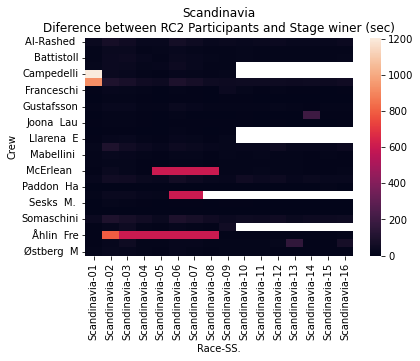

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC2 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

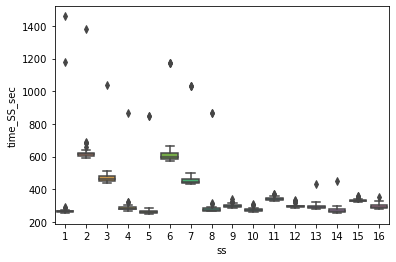

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

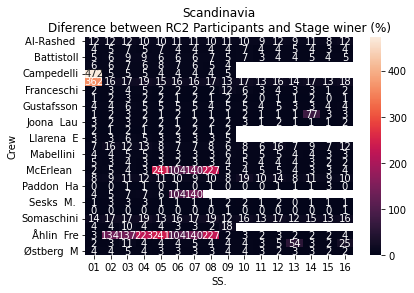

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC2 Participants and Stage winer (%)')
plt.savefig("Rc2.jpg")